In [1]:
from config import BaseConfig
from sentence_transformers import SentenceTransformer
import pandas as pd
import utils
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

def plot_diagrams(subtask, fontsize=11):
    CONFIG = BaseConfig().get_args(subtask=subtask, model='large')
    task_df = pd.read_csv(CONFIG.subtask_train)
    x, y = [str(utils.cleaner(X)) for X in task_df['text'].tolist()], [CONFIG.label2id_mapper[y] for y in task_df['label'].tolist()]

    model = SentenceTransformer(CONFIG.model_input_path)
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    rcParams['figure.figsize'] = 20, 10
    fig, axes = plt.subplots(nrows=2, ncols=4)
    axes[0,0].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[0,0].set_title("(2) Flan-T5 + Zero-Shot", fontsize=fontsize)
    # axes[0,0].set_yticklabels([])

    model = SentenceTransformer(CONFIG.model_output_path)
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[0,1].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[0,1].set_title("(3) Flan-T5 + Few-Shot", fontsize=fontsize)
    # axes[0,1].set_yticklabels([])

    model = SentenceTransformer(CONFIG.sbert_model_output_path)
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[0,2].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[0,2].set_title("(4) Flan-T5 + BiEncoder + CL + MNRL", fontsize=fontsize)
    # axes[0,2].set_yticklabels([])

    model = SentenceTransformer(CONFIG.sbert_model_output_path+"-fsl")
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[0,3].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[0,3].set_title("(5) Flan-T5 + Few-Shot + BiEncoder + CL + MNRLL", fontsize=fontsize)
    # axes[1,0].set_yticklabels([])
    
    model = SentenceTransformer(CONFIG.model_output_path_combined)
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[1,0].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[1,0].set_title("(6) Flan-T5 + Few-Shot + Combined", fontsize=fontsize)
    # axes[1,1].set_yticklabels([])
    
    model = SentenceTransformer(CONFIG.sbert_model_output_path+"-fsl-combined")
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[1,1].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[1,1].set_title("(7) Flan-T5 + Few-Shot + Combined + BiEncoder + CL + MNRLL", fontsize=fontsize)
    
    
    model = SentenceTransformer(CONFIG.model_output_path+"-final")
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[1,2].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[1,2].set_title("(Final) Flan-T5 + Few-Shot", fontsize=fontsize)
    # axes[0,2].set_yticklabels([])

    model = SentenceTransformer(CONFIG.sbert_model_output_path+"-final-fsl")
    x_embedding = model.encode(x)
    x_embedded = TSNE(n_components=2).fit_transform(x_embedding)
    axes[1,3].scatter(x_embedded[:,0], x_embedded[:,1], c=y)
    axes[1,3].set_title("(Final) Flan-T5 + Few-Shot + BiEncoder + CL + MNRLL", fontsize=fontsize)
    
    # axes[1,2].set_yticklabels([])
    # axes[1,2].set_xticklabels([])
    
    plt.show()
    fig.savefig(f'images/subtask-{subtask}-final-plots.jpg')
    fig.savefig(f'images/subtask-{subtask}-final-plots.pdf')

# Task1

No sentence-transformers model found with name ../LLMs4OL/assets/LLMs/flan-t5-large. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at ../LLMs4OL/assets/LLMs/flan-t5-large were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are initializing T5EncoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5EncoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No sentence-transformers model found with name assets/subtask1-large. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at assets/subtask1-large were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are initializing T5EncoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5EncoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name assets/subtask-large-combined. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at assets/subtask-large-combined were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are initializing T5En

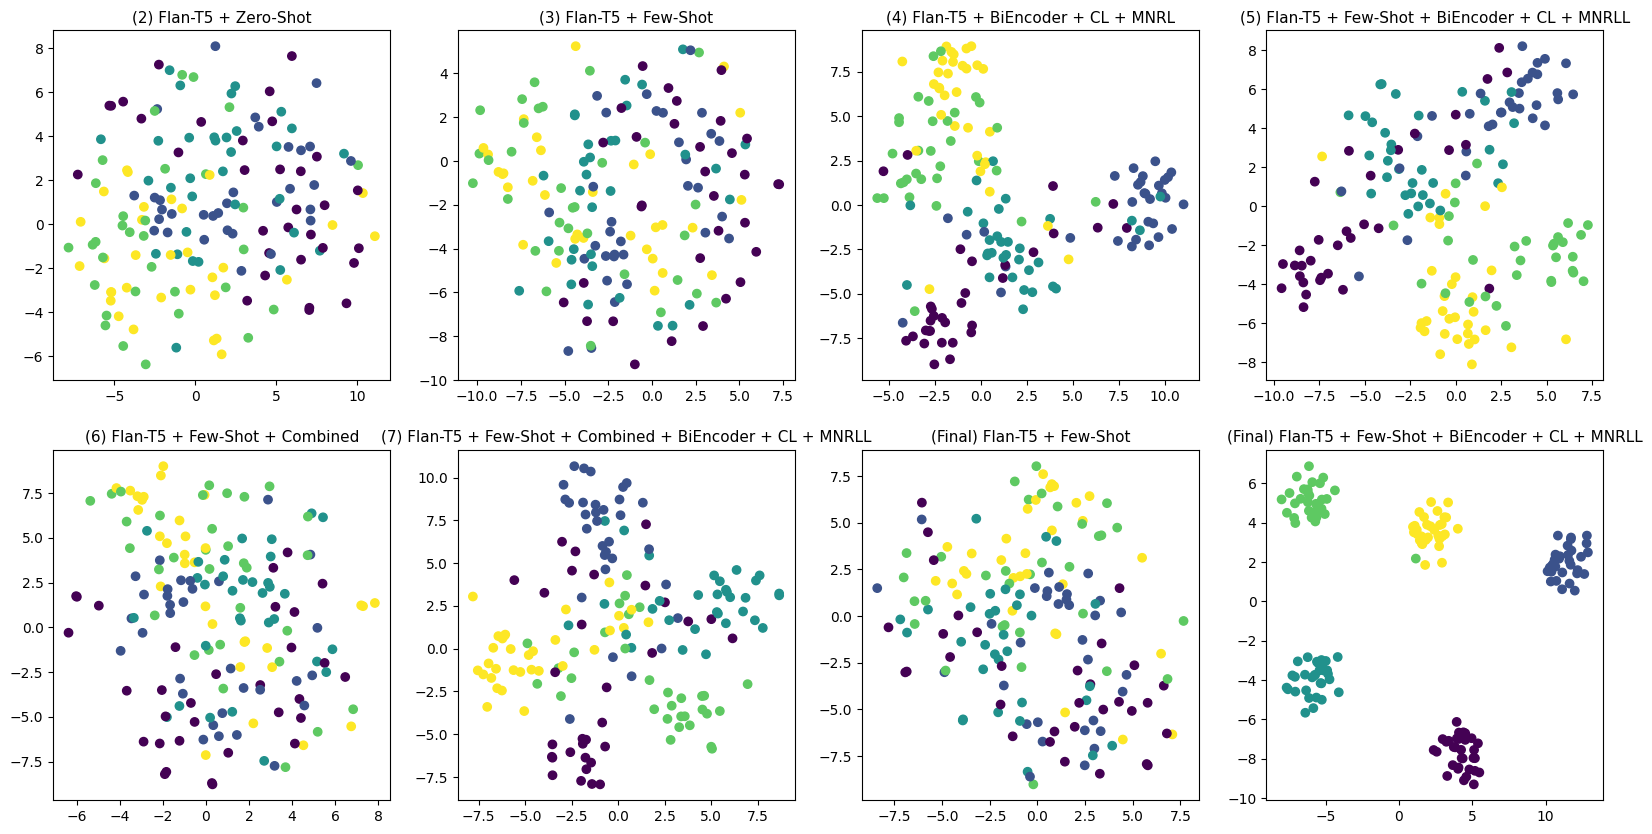

In [2]:
plot_diagrams(subtask=1)

# Task2

No sentence-transformers model found with name ../LLMs4OL/assets/LLMs/flan-t5-large. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at ../LLMs4OL/assets/LLMs/flan-t5-large were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are initializing T5EncoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5EncoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name assets/subtask2-large. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at assets/subtask2-large were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are ini

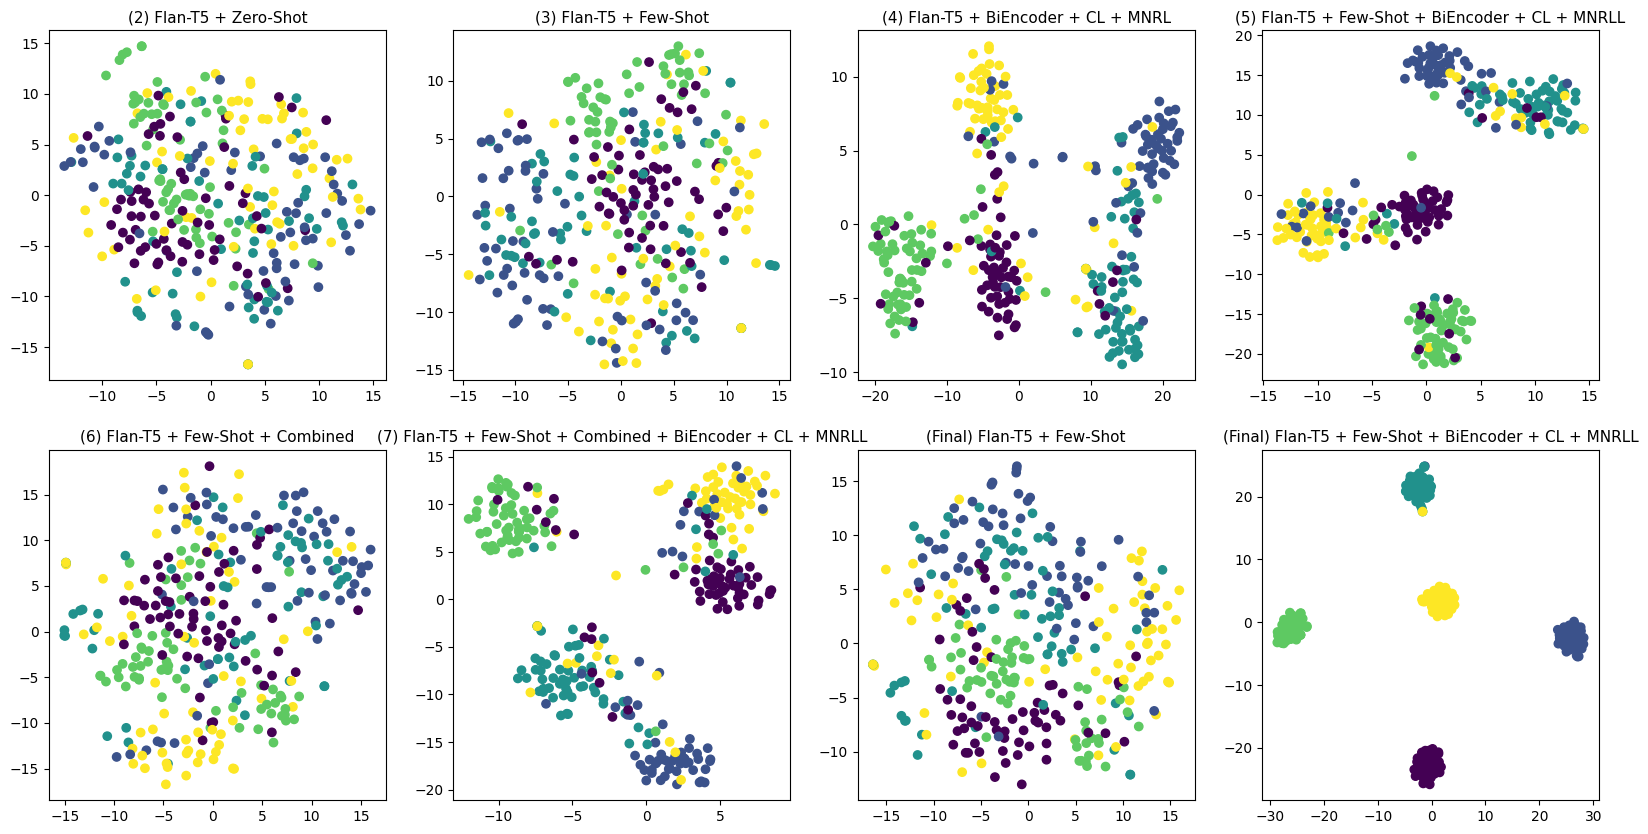

In [3]:
plot_diagrams(subtask=2)

# Task3

No sentence-transformers model found with name ../LLMs4OL/assets/LLMs/flan-t5-large. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at ../LLMs4OL/assets/LLMs/flan-t5-large were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are initializing T5EncoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5EncoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name assets/subtask3-large. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at assets/subtask3-large were not used when initializing T5EncoderModel: ['lm_head.weight']
- This IS expected if you are ini

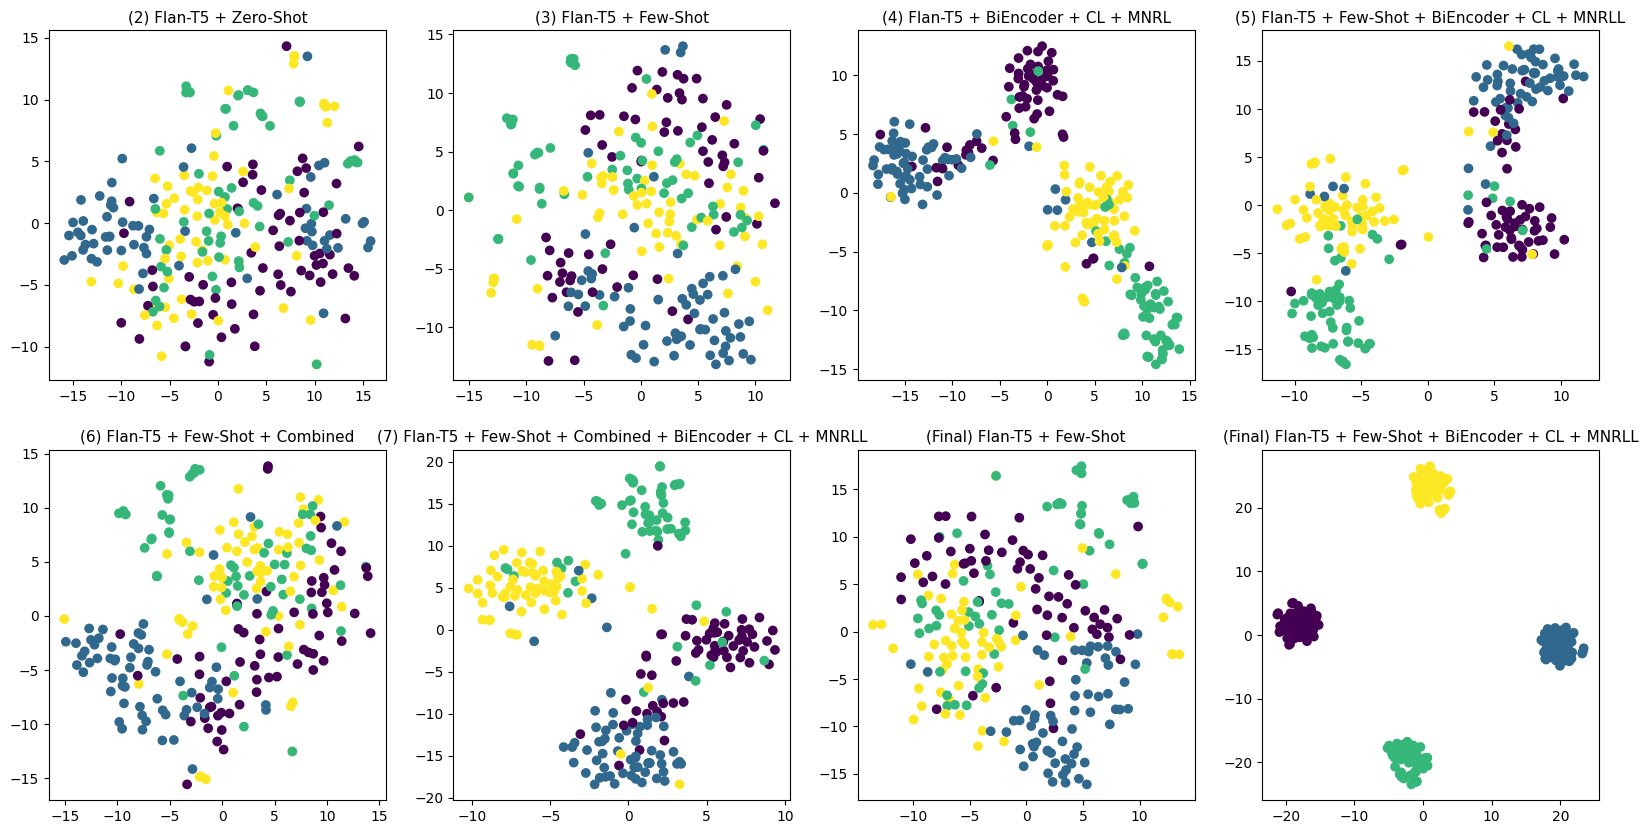

In [4]:
plot_diagrams(subtask=3)